[View in Colaboratory](https://colab.research.google.com/github/lapalb/DWM/blob/master/AgglomorativeClusteringUsingScipy.ipynb)

In [0]:
#Importing Libraries
import numpy as np
import pandas as pd

In [0]:
df=pd.read_csv("iris.csv",names=['pl','pw','sl','sw','type'])

In [8]:
df.corr()

,pl,pw,sl,sw
pl,1.000000,-0.109379,0.871811,0.818013
pw,-0.109379,1.000000,-0.420516,-0.356544
sl,0.871811,-0.420516,1.000000,0.962757
sw,0.818013,-0.356544,0.962757,1.000000


In [9]:
df.head()

,pl,pw,sl,sw,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
x=df['pl']
y=df['pw']

In [14]:
type(x)

pandas.core.series.Series

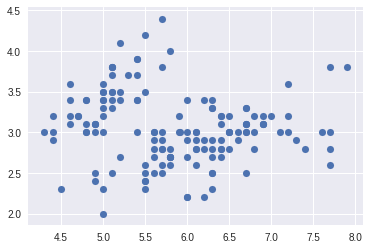

In [28]:
plt.scatter(x,y,linewidths=0.1)

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['type']=le.fit_transform(df['type'])


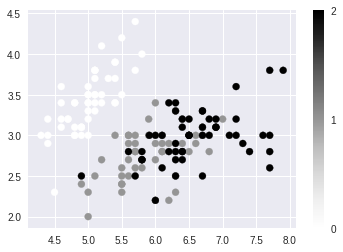

In [43]:
plt.scatter(x,y, c=df['type'])
plt.colorbar(ticks=[0, 1, 2] )

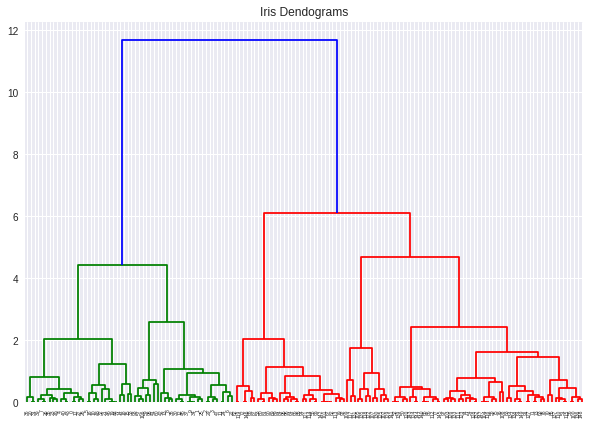

In [58]:
import scipy.cluster.hierarchy as shc
data=df.iloc[:,:2].values  
plt.figure(figsize=(10, 7))  
plt.title("Iris Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward')) 

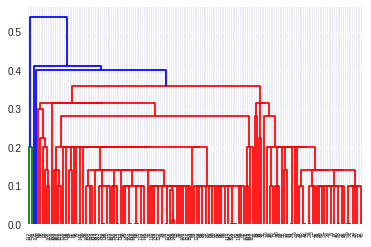

In [59]:
dend = shc.dendrogram(shc.linkage(data, method='single')) 

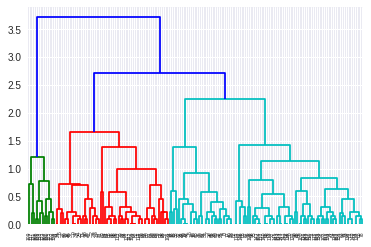

In [60]:
dend = shc.dendrogram(shc.linkage(data, method='complete')) 

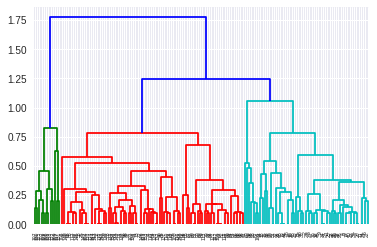

In [61]:
dend = shc.dendrogram(shc.linkage(data, method='centroid')) 

In [56]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data)  

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 1, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0])

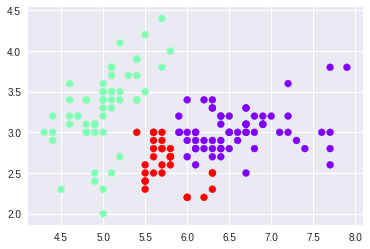

In [57]:
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')  